# **Breast Cancer Classification with SVM**

# **Step 1: Import Required Libraries**

In [75]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             accuracy_score)
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# **Step 2: Load and Prepare Dataset**

In [76]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# **Step 3: Data Preprocessing**

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Step 4: Feature Distribution Visualization**

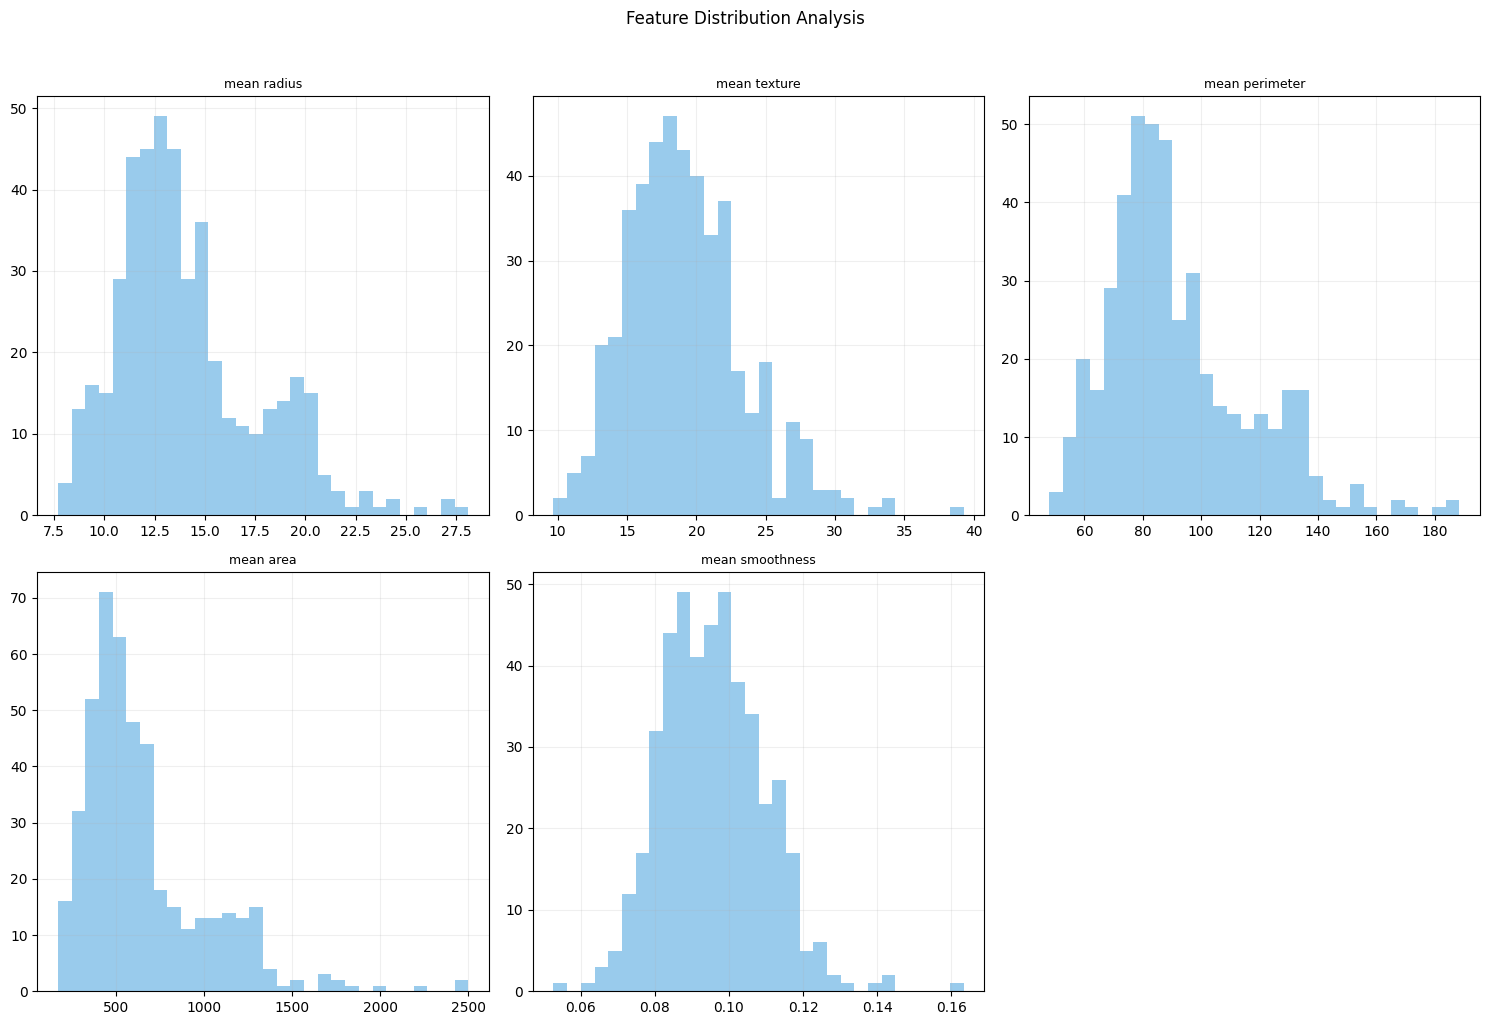

In [78]:
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.hist(X_train[:, i], bins=30, alpha=0.5, color='#3498db')
    plt.title(feature_names[i], fontsize=9)
    plt.grid(alpha=0.2)
plt.suptitle('Feature Distribution Analysis', y=1.02)
plt.tight_layout()
plt.show()

# **Step 5: SVM Model Implementation**

In [79]:
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train_scaled, y_train)

SVC(random_state=42)

# **Step 6: Model Evaluation**

In [80]:
y_pred = model.predict(X_test_scaled)

In [81]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2%}")


Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Accuracy: 98.25%


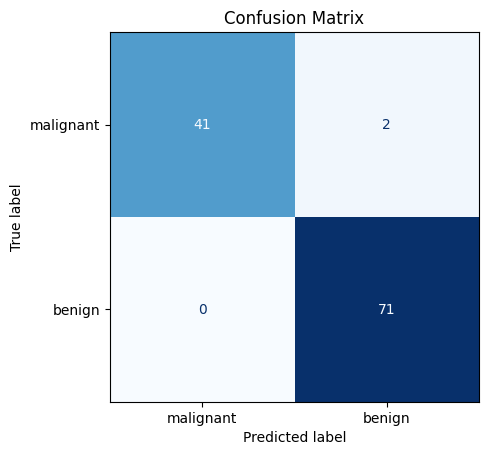

In [82]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=target_names)
disp.plot(cmap='Blues', colorbar=False)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# **Step 7: Sample Predictions**

In [83]:
# Sample Predictions Table
sample_indices = np.random.choice(len(X_test), 15, replace=False)
sample_data = {
    'Actual': [target_names[y] for y in y_test[sample_indices]],
    'Predicted': [target_names[y] for y in y_pred[sample_indices]],
    'Correct': y_test[sample_indices] == y_pred[sample_indices]
}
sample_df = pd.DataFrame(sample_data, index=sample_indices)

In [84]:
print("\nSample Predictions:")
print(sample_df)


Sample Predictions:
        Actual  Predicted  Correct
75      benign     benign     True
101     benign     benign     True
2    malignant  malignant     True
40      benign     benign     True
8       benign     benign     True
33      benign     benign     True
104     benign     benign     True
108     benign     benign     True
18      benign     benign     True
98      benign     benign     True
45      benign     benign     True
84   malignant  malignant     True
61   malignant  malignant     True
32      benign     benign     True
97   malignant  malignant     True
